This basic analysis aims to understand the two CSV datasets and guide the cleaning process.

**ANALYSING Rates_of Cases_or_Deaths.csv**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
raw = pd.read_csv("Data/raw/Rates_of_Cases_or_Deaths.csv")
print(raw)

     outcome     month  MMWR week     Age group Vaccine product  \
0       case  APR 2021     202114         12-17       all_types   
1       case  APR 2021     202114         18-29       all_types   
2       case  APR 2021     202114         30-49       all_types   
3       case  APR 2021     202114         50-64       all_types   
4       case  APR 2021     202114         65-79       all_types   
...      ...       ...        ...           ...             ...   
1586   death  AUG 2022     202235           80+       all_types   
1587   death  AUG 2022     202235  all_ages_adj       all_types   
1588   death  AUG 2022     202235  all_ages_adj         Janssen   
1589   death  AUG 2022     202235  all_ages_adj         Moderna   
1590   death  AUG 2022     202235  all_ages_adj          Pfizer   

      Vaccinated with outcome  Fully vaccinated population  \
0                           8                 3.688700e+04   
1                         674                 2.543093e+06   
2        

*Columns explained, based on data sources.*

Outcome: Covid-19 cases or deaths.
    
Month: calendar and year corresponding to MMWR week.
    
MMWR week: MMWR = morbidity and mortality weekly report. MMWR week represents the weeks in a year, coded for epidemiologic report.
                                                                                              
Age group: 0-4 years; 5-11 years; 12-17 years; 18-29 years; 30-49 years; 50-64 years; 65-79 years; 80+ years; and all_ages_adj.                                                                                            
Vaccinated with outcome: number of vaccinated individuals with a specific outcome (case or death).

Fully vaccinated population: the total population fully vaccinated.

Unvaccinated with outcome: number of unvaccinated individuals with a specific outcome (case or death).

Unvaccinated population: the total population unvaccinated.

Crude vax IR: crude incidence rate for vaccinated individuals.

Crude unvax IR: crude incidence rate for unvaccinated individuals.

Crude IRR: crude incidence rate ratio comparing vaccinated to unvaccinated.

Age adjusted vax IR: age-adjusted incidence rate for vaccinated individuals.

Age adjusted unvax IR: age-adjusted incidence rate for unvaccinated individuals.
                                            
Age adjusted IRR: age-adjusted incidence rate ratio.

Continuity correction: indicates whether a continuity correction was applied. It helps avoid overestimations 
                     
or underestimations when comparing groups (vaccinated vs. unvaccinated).

In [3]:
raw.head(100)

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
0,case,APR 2021,202114,12-17,all_types,8,36887.0,30785,17556462.0,21.687858,175.348541,8.085102,NaN,NaN,NaN,0
1,case,APR 2021,202114,18-29,all_types,674,2543093.0,76736,31091322.0,26.503160,246.808418,9.312415,NaN,NaN,NaN,0
2,case,APR 2021,202114,30-49,all_types,1847,7428405.0,98436,41074337.0,24.864019,239.653290,9.638558,NaN,NaN,NaN,0
3,case,APR 2021,202114,50-64,all_types,1558,7487444.0,50324,22948569.0,20.808169,219.290362,10.538667,NaN,NaN,NaN,0
4,case,APR 2021,202114,65-79,all_types,1672,14398099.0,14880,7675907.0,11.612644,193.853313,16.693297,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,case,JUN 2021,202123,80+,all_types,520,6631384.0,819,1915563.0,7.841500,42.755054,5.452407,NaN,NaN,NaN,0
96,case,JUN 2021,202123,all_ages_adj,all_types,5518,97084923.0,47757,84744356.4,5.683684,56.354195,9.915083,5.482305,58.226029,10.620721,1
97,case,JUN 2021,202123,all_ages_adj,Janssen,937,7498236.0,47757,84744356.4,12.496272,56.354195,4.509680,13.352781,58.226029,4.360592,1
98,case,JUN 2021,202123,all_ages_adj,Moderna,1550,39318396.0,47757,84744356.4,3.942175,56.354195,14.295204,3.549760,58.226029,16.402805,1


In [4]:
raw.tail(100)

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
1491,death,JUN 2022,202226,all_ages_adj,Pfizer,521,8.192239e+07,681,51962750.85,0.635968,1.310554,2.060724,0.518829,2.655112,5.117514,1
1492,death,JUL 2022,202227,5-11,all_types,0,5.374343e+06,1,12874043.00,0.000000,0.007768,NaN,NaN,NaN,NaN,0
1493,death,JUL 2022,202227,12-17,all_types,1,9.823716e+06,3,6077082.00,0.010179,0.049366,4.849556,NaN,NaN,NaN,0
1494,death,JUL 2022,202227,18-29,all_types,1,2.196835e+07,5,11460713.45,0.004552,0.043627,9.584197,NaN,NaN,NaN,1
1495,death,JUL 2022,202227,30-49,all_types,42,4.036712e+07,27,12390825.30,0.104045,0.217903,2.094315,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,death,AUG 2022,202235,80+,all_types,328,7.078966e+06,172,963095.40,4.633445,17.859082,3.854385,NaN,NaN,NaN,1
1587,death,AUG 2022,202235,all_ages_adj,all_types,603,1.428525e+08,398,50965568.85,0.422114,0.780919,1.850021,0.287258,1.605239,5.588152,1
1588,death,AUG 2022,202235,all_ages_adj,Janssen,33,1.075017e+07,398,50965568.85,0.306972,0.780919,2.543944,0.317448,1.605239,5.056694,1
1589,death,AUG 2022,202235,all_ages_adj,Moderna,286,4.941886e+07,398,50965568.85,0.578726,0.780919,1.349376,0.294841,1.605239,5.444415,1


In [5]:
# view the middle of the dataset.
middle_index = len(raw) // 2
raw.iloc[middle_index - 100: middle_index + 100]

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
695,case,JUL 2022,202228,50-64,all_types,84294,3.494729e+07,37537,6352019.7,241.203238,590.945900,2.449992,NaN,NaN,NaN,1
696,case,JUL 2022,202228,65-79,all_types,57824,2.589817e+07,20184,2016994.5,223.274476,1000.696829,4.481913,NaN,NaN,NaN,1
697,case,JUL 2022,202228,80+,all_types,20235,7.554475e+06,7183,964687.4,267.854484,744.593534,2.779843,NaN,NaN,NaN,1
698,case,JUL 2022,202228,all_ages_adj,all_types,338138,1.500346e+08,213393,53598539.8,225.373327,398.132115,1.766545,213.997895,508.927924,2.378191,1
699,case,JUL 2022,202228,all_ages_adj,Janssen,19694,1.136349e+07,213393,53598539.8,173.309371,398.132115,2.297234,209.131646,508.927924,2.433529,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,death,MAY 2021,202121,all_ages_adj,Moderna,41,3.355804e+07,887,85357268.0,0.122176,1.039162,8.505421,0.061206,1.624666,26.544314,1
891,death,MAY 2021,202121,all_ages_adj,Pfizer,62,4.331761e+07,887,85357268.0,0.143129,1.039162,7.260322,0.083453,1.624666,19.468015,1
892,death,JUN 2021,202122,12-17,all_types,0,1.128399e+06,0,13107940.0,0.000000,0.000000,NaN,NaN,NaN,NaN,0
893,death,JUN 2021,202122,18-29,all_types,0,1.134455e+07,10,21984414.0,0.000000,0.045487,NaN,NaN,NaN,NaN,0


In [3]:
raw.shape

(1591, 16)

In [4]:
raw.columns

Index(['outcome', 'month', 'MMWR week', 'Age group', 'Vaccine product',
       'Vaccinated with outcome', 'Fully vaccinated population',
       'Unvaccinated with outcome', 'Unvaccinated population', 'Crude vax IR',
       'Crude unvax IR', 'Crude IRR', 'Age adjusted vax IR',
       'Age adjusted unvax IR', 'Age adjusted IRR', 'Continuity correction'],
      dtype='object')

In [5]:
raw.dtypes

outcome                         object
month                           object
MMWR week                        int64
Age group                       object
Vaccine product                 object
Vaccinated with outcome          int64
Fully vaccinated population    float64
Unvaccinated with outcome        int64
Unvaccinated population        float64
Crude vax IR                   float64
Crude unvax IR                 float64
Crude IRR                      float64
Age adjusted vax IR            float64
Age adjusted unvax IR          float64
Age adjusted IRR               float64
Continuity correction            int64
dtype: object

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   outcome                      1591 non-null   object 
 1   month                        1591 non-null   object 
 2   MMWR week                    1591 non-null   int64  
 3   Age group                    1591 non-null   object 
 4   Vaccine product              1591 non-null   object 
 5   Vaccinated with outcome      1591 non-null   int64  
 6   Fully vaccinated population  1591 non-null   float64
 7   Unvaccinated with outcome    1591 non-null   int64  
 8   Unvaccinated population      1591 non-null   float64
 9   Crude vax IR                 1591 non-null   float64
 10  Crude unvax IR               1591 non-null   float64
 11  Crude IRR                    1477 non-null   float64
 12  Age adjusted vax IR          604 non-null    float64
 13  Age adjusted unvax

In [7]:
raw.describe()

,MMWR week,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
count,1591.000000,1.591000e+03,1.591000e+03,1.591000e+03,1.591000e+03,1591.000000,1591.000000,1477.000000,604.000000,604.000000,604.000000,1591.000000
mean,202176.382778,3.385382e+04,3.540908e+07,6.641138e+04,3.023931e+07,84.439139,240.871541,7.014693,85.046576,251.477361,7.773610,0.658077
std,44.195349,1.165829e+05,3.601584e+07,1.837253e+05,2.851263e+07,201.563571,477.663276,8.481700,200.339063,493.368707,6.216054,0.474503
min,202114.000000,0.000000e+00,3.567800e+04,0.000000e+00,9.436914e+05,0.000000,0.000000,0.000000,0.042785,0.691227,1.151808,0.000000
25%,202133.000000,9.250000e+01,9.610290e+06,4.140000e+02,6.529195e+06,0.363132,1.585890,2.286517,0.517824,2.926206,3.170636,0.000000
50%,202201.000000,1.253000e+03,2.390094e+07,4.712000e+03,1.443123e+07,7.649694,59.369738,4.402462,5.572722,58.226029,5.254769,1.000000
75%,202219.000000,2.124700e+04,4.305090e+07,4.940050e+04,5.422110e+07,97.061261,308.961001,7.736353,100.184844,356.017441,11.070802,1.000000
max,202238.000000,2.016034e+06,1.510390e+08,1.882489e+06,1.228712e+08,2090.173796,3991.947275,120.480671,1618.610794,3369.222957,33.831621,1.000000


**Statistics explained**

**Count**

Represents the number of non-missing entries in each column.
Most columns have 1,591 entries, but:
Crude IRR has 1,477 entries; Age adjusted vax IR, Age adjusted unvax IR, 
Age adjusted IRR have each only 604 entries,indicating some missing data.

**Mean**

Mean is the central tendency of the data.
On average, there are ~33,853 vaccinated individuals with outcomes.
Fully vaccinated and unvaccinated populations are approximately 35M and 30M, respectively.
Crude IR for vaccinated individuals is 84.4 per 100,000 population, while for unvaccinated, it’s 240.87.
Crude IRR is ~7, suggesting unvaccinated individuals have a 7x higher incidence rate than vaccinated individuals.
Age-adjusted metrics reflect similar trends with Crude metrics. 
Age-adjusted IRR mean is 7.77 reinforcing that unvaccinated individuals face consistently greater risks of case or death. A deeper investigation will be conducted into this assumption.

**Standard Deviation (std)**
               
std is the distribution or variability in data.
High std values in populations (fully vaccinated and unvaccinated) reflect significant variation across MMWR weeks.
Crude IRs and IRRs also show large variability.

**Minimum (min)**

The smallest values in each column.
Outcome (Vaccinated with outcome and Unvaccinated with outcome): 0, likely indicats weeks with no reported cases.

**Percentiles (25%, 50%, 75%)**

Provide a breakdown of data distribution.
25th percentile: 25% of the data lies below this value.
50th percentile (median): The middle value of the data.
75th percentile: 75% of the data lies below this value.

**Maximum (max)**

The highest values recorded.
Vaccinated with outcome: 2M, likely reflecting a surge in cases during a specific week.
Fully vaccinated population: 151M, possibly representing cumulative coverage.
Crude IRR: 120.48, showing an extreme disparity in incidence rates during certain weeks.

**Missing Data**: Age-adjusted rates columns have few entries (only 604).

**Continuity Correction**: 0 or 1 suggests whether a continuity correction was applied for particular weeks to smooth data.

**Key Observations**

The mean Crude IRR (~7) indicates a consistent trend where unvaccinated individuals experience significantly 
higher incidence rates compared to vaccinated ones.

QUICK INSIGHT VISUALISATION

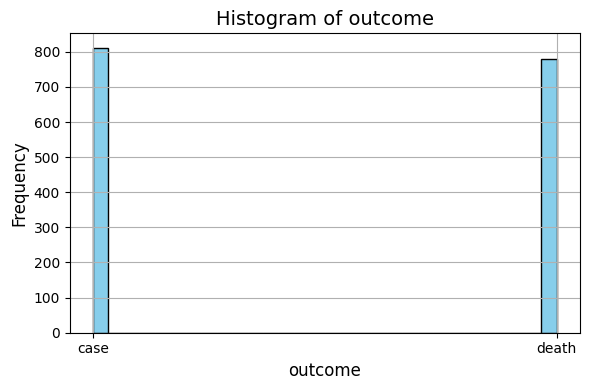

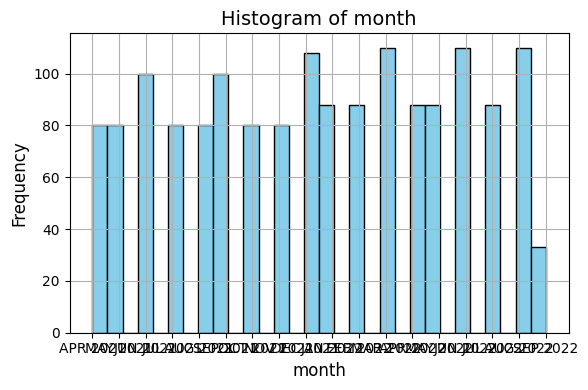

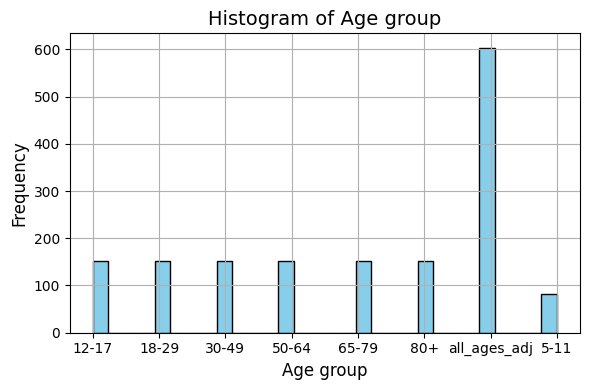

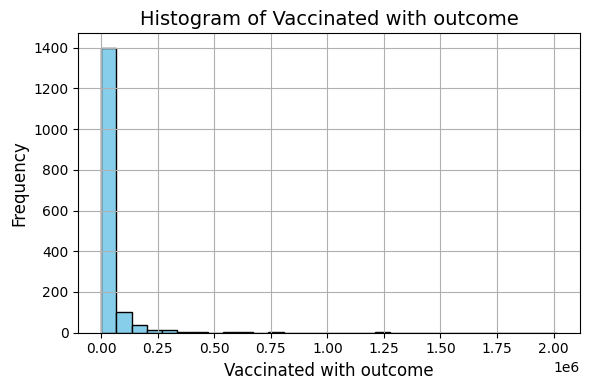

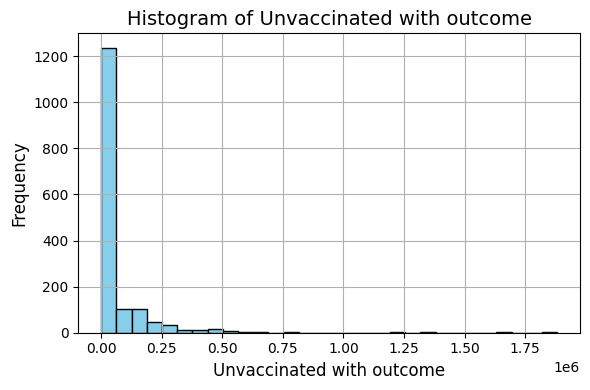

In [8]:
# List of columns to plot
columns = [
     'outcome', 'month', 'Age group', 'Vaccinated with outcome', 
    'Unvaccinated with outcome'
]

# Plot each histogram in a separate figure
for col in columns:
    plt.figure(figsize=(6, 4))
    raw[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

Histogram of outcome: the high frequency for case suggests that most records are related to cases rather than deaths.
    The death frequencies are slightly lower but still substantial.
    The close frequencies between case and death suggest relatively proportional representation.
Cleaning Focus: ensure the outcome column has only case or death values, with no typos, blanks, or inconsistencies.

Histogram of month: ensure no typos, blanks or inconsistencies.

Age group: the spike for all_ages_adj suggests it's not a distinct age group but an aggregate or adjusted value; 
It will be necessaire to filter(separate) it for focused analysis. Look for missing values or misclassifications.
Ensure there are no duplicate entries for combined or overlapping age ranges.

Vaccinated with Outcome: most data is near zero, check for zeros or missing values.
    
Unvaccinated with Outcome: look for unusually high or extreme values in the tail, check for completeness to ensure all outcomes are reported.
                                                                                   

In [9]:
# print month table to better see the distribution of occurrencies as the histogram does not print the dates.

month_counts = raw['month'].value_counts()

# Convert to a DataFrame for tabulation
month_table = month_counts.reset_index()
month_table.columns = ['month', 'Frequency']

print(month_table)

       month  Frequency
0   AUG 2022        110
1   JUN 2022        110
2   MAR 2022        110
3   DEC 2021        108
4   SEP 2021        100
5   JUN 2021        100
6   MAY 2022         88
7   APR 2022         88
8   FEB 2022         88
9   JAN 2022         88
10  JUL 2022         88
11  APR 2021         80
12  MAY 2021         80
13  AUG 2021         80
14  OCT 2021         80
15  NOV 2021         80
16  JUL 2021         80
17  SEP 2022         33


The data distribution indicates that the months with the highest frequencies, such as August, June, and March of 2022, have 110 occurrences each, 
suggesting these periods had more outcome or reporting. Months like September 2022 have significantly lower frequencies (33), indicating either 
less reporting or reduced outcome.

In [10]:
case_rows = raw[raw["outcome"] == "case"].shape[0]
print("Number of case rows:", case_rows)

Number of case rows: 812


In [11]:
death_rows = raw[raw["outcome"] == "death"].shape[0]
print("Number of death rows:", death_rows)

Number of death rows: 779


HANDLING INVALID ENTRIES

In [12]:
raw = pd.read_csv("Data/raw/Rates_of_Cases_or_Deaths.csv")

# Define the is_valid function for validation
def is_valid(value, col_name):
    if pd.isna(value): 
        return False
    if col_name == 'outcome':  
        valid_outcome = ['case', 'death']
        return value in valid_outcome or pd.isna(value)
    elif col_name in [
        'Vaccinated with outcome',
        'Unvaccinated with outcome',
        'month', 'Age group'
    ]: 
        return isinstance(value, (int, float)) and value >= 0
    return True

validity_matrix = raw.apply(lambda col: col.apply(lambda val: is_valid(val, col.name)))

# Identify invalid entries
invalid_values = ~validity_matrix
invalid_entries = raw[invalid_values]

# Count invalid entries per column
invalid_count = invalid_values.sum()
print("\nInvalid entries per column:")
print(invalid_count)

# Total invalid entries in the dataset
total_invalid = invalid_values.sum().sum()
print(f"\nTotal invalid entries in the dataset: {total_invalid}")


Invalid entries per column:
outcome                           0
month                          1591
MMWR week                         0
Age group                      1591
Vaccine product                   0
Vaccinated with outcome           0
Fully vaccinated population       0
Unvaccinated with outcome         0
Unvaccinated population           0
Crude vax IR                      0
Crude unvax IR                    0
Crude IRR                       114
Age adjusted vax IR             987
Age adjusted unvax IR           987
Age adjusted IRR                987
Continuity correction             0
dtype: int64

Total invalid entries in the dataset: 6257


In [13]:
raw.isnull().sum()

outcome                          0
month                            0
MMWR week                        0
Age group                        0
Vaccine product                  0
Vaccinated with outcome          0
Fully vaccinated population      0
Unvaccinated with outcome        0
Unvaccinated population          0
Crude vax IR                     0
Crude unvax IR                   0
Crude IRR                      114
Age adjusted vax IR            987
Age adjusted unvax IR          987
Age adjusted IRR               987
Continuity correction            0
dtype: int64

**ANALYSING County_Level_of_community_Transmission.csv**

In [14]:
raw = pd.read_csv("Data/raw/County_Level_of_community_Transmission.csv")
print(raw)

           state_name        county_name  fips_code        date  \
0               Texas     Jackson County      48239  01/27/2020   
1            Nebraska     Buffalo County      31019  01/27/2020   
2            Illinois       Coles County      17029  01/27/2020   
3                Iowa         Ida County      19093  01/27/2020   
4           Tennessee        Knox County      47093  02/05/2020   
...               ...                ...        ...         ...   
3225217     Louisiana  Assumption Parish      22007  10/18/2022   
3225218  South Dakota        Hyde County      46069  10/18/2022   
3225219         Texas      Loving County      48301  10/18/2022   
3225220      Virginia     Lynchburg City      51680  10/18/2022   
3225221       Wyoming    Converse County      56009  10/18/2022   

        cases_per_100K_7_day_count_change  \
0                                   0.000   
1                                   0.000   
2                                   0.000   
3              

*Columns explained*

state_name: US State

county_name: US county.

fips_code: county Federal Information Processing Standards (FIPS) code.

date: Week ending date for the 7-day period for the case rate and the percent positivity. 
      The last day of a 7-day period used to calculate case rate and percent positivity for COVID-19 data.

cases_per_100K_7_day_count_change: total number of new cases per 100,000 persons within the last 7 days.

percent_test_results_reported_positive_last_7_days: percentage of positive diagnostic and screening tests during the last 7 days.

community_transmission_level: Community Transmission Level Indicator (low, moderate, substantial, high)  

In [15]:
raw.head(1000)

,state_name,county_name,fips_code,date,cases_per_100K_7_day_count_change,percent_test_results_reported_positive_last_7_days,community_transmission_level
0,Texas,Jackson County,48239,01/27/2020,0.000,NaN,NaN
1,Nebraska,Buffalo County,31019,01/27/2020,0.000,NaN,NaN
2,Illinois,Coles County,17029,01/27/2020,0.000,NaN,NaN
3,Iowa,Ida County,19093,01/27/2020,0.000,NaN,NaN
4,Tennessee,Knox County,47093,02/05/2020,0.000,NaN,low
...,...,...,...,...,...,...,...
995,Nevada,Lander County,32015,10/17/2022,suppressed,NaN,substantial
996,Nevada,Mineral County,32021,10/17/2022,0.000,NaN,low
997,Tennessee,Campbell County,47013,10/17/2022,112.946,NaN,high
998,Tennessee,Gibson County,47053,10/17/2022,177.070,NaN,high


In [16]:
raw.tail(1000)

,state_name,county_name,fips_code,date,cases_per_100K_7_day_count_change,percent_test_results_reported_positive_last_7_days,community_transmission_level
3224222,Puerto Rico,San Juan Muni,72127,10/18/2022,89.500,NaN,substantial
3224223,Florida,Flagler County,12035,10/18/2022,39.970,10.58,high
3224224,Kentucky,Harlan County,21095,10/18/2022,80.740,3.21,substantial
3224225,New York,Columbia County,36021,10/18/2022,122.770,17.12,high
3224226,North Carolina,Bertie County,37015,10/18/2022,100.280,4.59,high
...,...,...,...,...,...,...,...
3225217,Louisiana,Assumption Parish,22007,10/18/2022,suppressed,0.00,low
3225218,South Dakota,Hyde County,46069,10/18/2022,0.000,NaN,low
3225219,Texas,Loving County,48301,10/18/2022,suppressed,14.29,high
3225220,Virginia,Lynchburg City,51680,10/18/2022,26.770,8.01,substantial


In [17]:
# view the middle of the dataset.
middle_index = len(raw) // 2
raw.iloc[middle_index - 1000: middle_index + 1000]

,state_name,county_name,fips_code,date,cases_per_100K_7_day_count_change,percent_test_results_reported_positive_last_7_days,community_transmission_level
1611611,Oklahoma,Garvin County,40049,05/26/2020,0.000,0.44,low
1611612,Oklahoma,Hughes County,40063,05/26/2020,0.000,1.12,low
1611613,Oklahoma,Latimer County,40077,05/26/2020,0.000,0.00,low
1611614,Oklahoma,Logan County,40083,05/26/2020,suppressed,0.00,low
1611615,Oklahoma,McClain County,40087,05/26/2020,suppressed,0.85,low
...,...,...,...,...,...,...,...
1613606,Michigan,Wayne County,26163,05/26/2020,40.987,5.11,moderate
1613607,Minnesota,Aitkin County,27001,05/26/2020,suppressed,4.12,moderate
1613608,Minnesota,Anoka County,27003,05/26/2020,87.694,12.78,high
1613609,Minnesota,Benton County,27009,05/26/2020,56.250,15.21,high


In [18]:
raw.shape

(3225222, 7)

In [19]:
raw.columns

Index(['state_name', 'county_name', 'fips_code', 'date',
       'cases_per_100K_7_day_count_change',
       'percent_test_results_reported_positive_last_7_days',
       'community_transmission_level'],
      dtype='object')

In [23]:
raw.isnull().sum()

state_name                                              2662
county_name                                             2662
fips_code                                                  0
date                                                       0
cases_per_100K_7_day_count_change                          0
percent_test_results_reported_positive_last_7_days    401338
community_transmission_level                           22661
dtype: int64

In [24]:
raw.dtypes

state_name                                             object
county_name                                            object
fips_code                                               int64
date                                                   object
cases_per_100K_7_day_count_change                      object
percent_test_results_reported_positive_last_7_days    float64
community_transmission_level                           object
dtype: object

In [25]:
# CALCULATE INVALIDE ENTRIES PER COLUMN

raw = pd.read_csv("Data/raw/County_Level_of_community_Transmission.csv")

def is_valid(value, col_name):
    if pd.isna(value): 
        return False
    if col_name == 'state_name': 
        return isinstance(value, str) and len(value.strip()) > 0
    elif col_name == 'county_name':  
        return isinstance(value, str) and len(value.strip()) > 0
    elif col_name == 'fips_code': 
        return bool(re.match(r"^\d{5}$", str(value)))
    elif col_name == 'date':  
        return bool(re.match(r"^(0[1-9]|[12]\d|3[01])-(0[1-9]|1[0-2])-\d{4}$", str(value)))
    elif col_name == 'cases_per_100K_7_day_count_change':  
        return isinstance(value, (int, float)) and value >= 0
    elif col_name == 'percent_test_results_reported_positive_last_7_days':  
        return isinstance(value, (int, float)) and 0 <= value <= 100
    elif col_name == 'community_transmission_level': 
        valid_levels = ['low', 'moderate', 'substantial', 'high']
        return value in valid_levels
    return True  
validity_matrix = raw.apply(lambda col: col.apply(lambda val: is_valid(val, col.name)))

# Identify invalid entries
invalid_values = ~validity_matrix
invalid_entries = raw[invalid_values]

# Count invalid entries per column
invalid_count = invalid_values.sum()
print("\nInvalid entries per column:")
print(invalid_count)

# Total invalid entries in the dataset
total_invalid = invalid_values.sum().sum()
print(f"\nTotal invalid entries in the dataset: {total_invalid}")


Invalid entries per column:
state_name                                               2662
county_name                                              2662
fips_code                                              318318
date                                                  3225222
cases_per_100K_7_day_count_change                     3225222
percent_test_results_reported_positive_last_7_days     401338
community_transmission_level                            22661
dtype: int64

Total invalid entries in the dataset: 7198085


QUICK INSIGHT VISUALISATION OF IMPORTANT COLUMNS

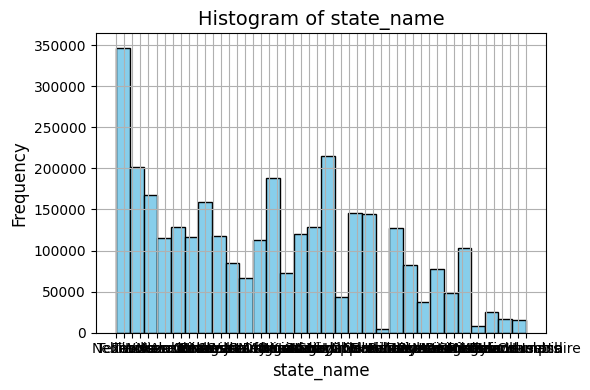

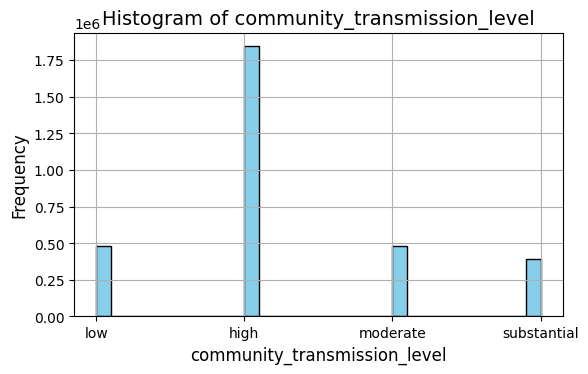

In [19]:
# List of columns to plot
columns = [
     'state_name', 'community_transmission_level'
]

# Plot each histogram in a separate figure
for col in columns:
    plt.figure(figsize=(6, 4))
    raw[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

In [26]:

# print state_name table to better see the distribution of occurrencies as the histogram does not print the states' names.

state_counts = raw['state_name'].value_counts()

# Convert to a DataFrame for tabulation
state_table = state_counts.reset_index()
state_table.columns = ['State Name', 'Frequency']

print(state_table)

              State Name  Frequency
0                  Texas     254000
1                Georgia     159000
2               Virginia     133000
3               Kentucky     120000
4               Missouri     115000
5                 Kansas     105000
6               Illinois     102000
7         North Carolina     100000
8                   Iowa      99099
9              Tennessee      95095
10              Nebraska      93000
11               Indiana      92092
12                  Ohio      88000
13             Minnesota      87000
14              Michigan      83000
15           Mississippi      82000
16           Puerto Rico      78000
17              Oklahoma      77000
18              Arkansas      75000
19             Wisconsin      72000
20               Alabama      67067
21               Florida      67000
22          Pennsylvania      67000
23          South Dakota      66001
24              Colorado      64000
25             Louisiana      64000
26              New York    

state_name: presents skewed distribution, with one state (Texas) having significantly more occurrences than others. 
The state less affected during this period of study (2020 - 2022) is District of Columbia.
The remaining states are distributed almost evenly, with lower frequencies.

community_transmission_level: the peak at 'high' may indicate that the majority of the data are associated with a high level of transmission. 
The population experienced high level of transmission during the period being analyzed.